Vicente De Leon

Deep Learning Principles: Homework 2

UID: 2001014594 

# TensorFlow

In [ ]:
!pip install --upgrade tensorflow # Latest Tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__) # Tensorflow version

2.12.0


TensorBoard dependencies not necessary, keeping these codes here in case of future references.

In [ ]:
#!pip install -q -U tensorboard
#!pip install tensorboard==2.12.0

Loading the TensorBoard notebook extension

In [4]:
#import datetime
#%load_ext tensorboard

In [5]:
#from tensorflow.keras.callbacks import TensorBoard

# Pandas, Numpy, Keras

In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import MeanAbsoluteError

# Task

## Model

Last semester I had the opportunity to take Applied Machine Learning course in which we use Deep Learning tools like PyTorch, TensorFlow (Keras), Tensorboard to create our own MLP, CNN, FCN Models for object classification and detection. We as a group, had the opportunity to use different optimizers, regularization techniques, and tools to create our models. Since this is a basic model, I will try to stick as basic a possible using internet sources and Applied Machine Learning coursework including my group final project work for formulas/techniques etc.

Even though my CNN model from last semester had a similar structure using Sequential(), I found that creating a deep learning model this way makes it easier for me to understand. Since this is not a CNN model (Conv2D), I will use Dense layer which is fully connected layer and the most common type of layer used on MLP Models.
Specifications:
-	5-dimensional vector.
-	Hidden layer has a three dimension with bias enabled. Activation function is ReLU.
-	Final layer outputs a scalar value with sigmoid activation.

`Relu Activation Function` (Rectified Activation Function): With default values, this returns the standard ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor.

$$ReLU(x) = (x)^+ = \max(0, x)$$

`Sigmoid Activation Function` Will always returns a value between 0 and 1.

$$\text{Sigmoid}(x) = \sigma(x) = \frac{1}{1 + e^{-x}}$$

`Mean Absolute Error` is the average of all absolute errors. The absolute average distance between the real data and the predicted data. In this case the MAE will be used to minimze the absolute difference between the predicted output and the output 0.30.

$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$


In [4]:
# Prof J. Shanahan adviced us to RELU instead of Sigmoid for final project.
# hidden dimensions -> 3
# input dimensions -> 5
# output dimensions -> 1

# Basic initial learning rate from APML homework
lr = 0.01

model = Sequential()

model.add(Dense(3, input_dim = 5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) # Final Layer outputs a scalar value with sigmoid

model.compile(loss = MeanAbsoluteError(),
              optimizer = SGD(lr)) # APML homework -> Stochastic Gradient Descent. Adam, RMSProp, Adagrad

The `first layer` (Dense - fully connected) has 3 hidden layers and 5 input dimensions -> (5x3) and 3 = 15 weights and 3 biases.

The `second layer` (Dense - fully connected) has 3 layers from the previous layer and 1 hidden layer -> (3x1) and 1 = 3 weights and 1 bias.
Total weights -> 15 + 3 = 18 weights 
Total biases -> 3 + 1 = 4 biases.

Total params -> 18 + 4 = 22.


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 18        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


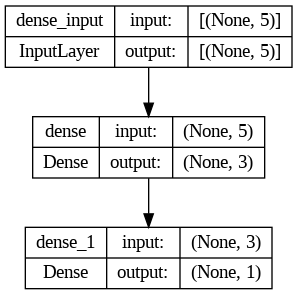

In [7]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Training

Creating X_train which is going to be an array of specified shape of (1000, 5). This will be used as the input data for the model. The y_train is going to be an array of shape of (1000, 1) filled with 0.30. This is going to be used ad the target output.

Epochs, learning rate, and any other number that is not related to input, output, or hidden dimensions are just picked randomly and from Applied Machine Learning coursework.

In [8]:
# random seed APML homework
np.random.seed(0)

# input dimensions -> 5
# output dimensions -> 1
X_train = np.random.rand(1000, 5) # APML Homework
y_train = np.full((1000, 1), 0.30) # output of 0.30

In [9]:
epochs = 100 # 50 epochs (no), 100 epochs got me the wanted predicted result of 0.30

history = model.fit(X_train, y_train, epochs = epochs, verbose = 1) # APML Homework
min_loss = min(history.history['loss']) # APML Homework
print('\n')
print(f'Thelowest training loss after 1000 epochs is: {min_loss}')

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.1483
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1123
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0923
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0818
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0756
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0720
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0697
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0679
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0649
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0635
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0621
Epoch 13/100
32/32 [=================

The lowest training loss after 100 epochs is -> 0.000643896812107414.

### Test

In [10]:
# input dimensions -> 5
# output dimensions -> 1

X_test = np.random.rand(100, 5)

In [11]:
prediction = model.predict(X_test)
y_pred = np.round(prediction, 3)
print(f'Prediction is: {y_pred[0][0]}') # 50 epochs not useful

4/4 [==============================] - 0s 3ms/step
Prediction is: 0.30000001192092896


### Finding the Parameters (Weights and Bias)

In [12]:
print('Printing the Weights and Biases of the layers')
print('\n')

for layer in model.layers:
  print(layer.name)
  print('Weights')
  print(layer.get_weights()[0])
  print('\n')
  print(layer.get_weights()[1])

Printing the Weights and Biases of the layers


dense
Weights
[[-0.6939692  -0.4182837   0.34200397]
 [ 0.5368299   0.63971615  0.6429566 ]
 [-0.17585093 -0.3461465   0.6113551 ]
 [-0.37394232 -0.40165076 -0.45171598]
 [-0.7481547   0.02051195 -0.1393025 ]]


[ 0.00190448 -0.31035215  0.3561374 ]
dense_1
Weights
[[-0.13142686]
 [ 1.0805383 ]
 [-0.00212832]]


[-0.8483002]


# References

- Model: https://neptune.ai/blog/how-to-choose-a-learning-rate-scheduler

- Model: https://machinelearningmastery.com/build-multi-layer-perceptron-neural-network-models-keras/

- Model: https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/

- Model: https://faroit.com/keras-docs/1.0.1/getting-started/sequential-model-guide/

- ReLU and Sigmoid: https://keras.io/api/layers/activations/

- MAE: https://www.tensorflow.org/api_docs/python/tf/keras/metrics/mean_absolute_error

- MAE: https://hackernoon.com/my-notes-on-mae-vs-mse-error-metrics

- MAE: https://deepchecks.com/glossary/mean-absolute-error/#:~:text=It%20is%20measured%20as%20the,n)%20%7Cy_i%20–%20ŷ_i%7C

- get_weights() TensorFlow: https://www.codespeedy.com/get_weights-and-set_weights-functions-in-keras-layers/

Extra:

- https://phoenixnap.com/kb/check-tensorflow-version

- Numpy: https://www.geeksforgeeks.org/numpy-random-rand-python/

- Numpy: https://www.geeksforgeeks.org/numpy-full-python/